# Using the tools: the Generalized Context Model

The GCM has been the de facto standard model of categorization for the last 30 years. It formalized (and generalized existing theories) the idea that people make category judgements by comparing new items to all existing items in memory and computing the similarity between these items.

In this example we are going to use the tools we learned today to build a basic implementation of the GCM algorithm. You can find the paper online at: http://www.cogs.indiana.edu/nosofsky/pubs/1986_rmn_jep-g_attention.pdf

First, let's start with a few items that have been previously learned. These stimuli are each represented as a point along two continuous dimensions (for example, height and hue of a square) and a category label (either 1 or 2 in this example).

In [2]:
x_coords = [3, 4, 5, 6]
y_coords = [2, 5, 7, 8]
labels = [1, 1, 2, 2]

Just for clarity, let's plot what these points look like. I know we haven't talked about plotting yet (it is coming later this week), but this is useful to understand the cognitive representation.

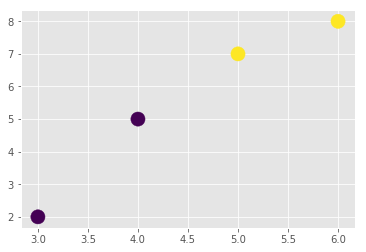

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('ggplot')

plt.scatter(x_coords, y_coords, c=labels, s=200)
plt.show()

## Testing a new item

Now we are going to determine which category the model assigns a new item to. The new item is defined by an x and y coordinate:

In [7]:
# test item
new_x = 4.5
new_y = 6

The GCM has a number of parameters which are usually fit to human data. For today, let's just pick 

In [9]:
import math # we need this for the GCM equations

# gcm parameters
r = 2 # Minkowski metric: 2 implies Euclidian distance function
c = 1
weight_x = 0.5 # weights assigned to each dimension
weight_y = 1 - weight_x
bias_1 = 0.5 # bias toward each category option
bias_2 = 1 - bias_1 

In [12]:
# variables to store similarity scores for each category
sim_cat1 = 0
sim_cat2 = 0

# for each item in memory
for i in range(len(x_coords)):
    
    # compute the distance scores of this item to the current item in memory
    distance_x = weight_x * (new_x - x_coords[i])**r
    distance_y = weight_y * (new_y - y_coords[i])**r
    distance = distance_x + distance_y 
    
    # convert distance to similarity
    similarity = math.exp(-1 * c * distance**(1/r))
    
    # add that similarity score to the appropriate score
    if labels[i] == 1:
        sim_cat1 += similarity
    else:
        sim_cat2 += similarity

# compute the probability of assigning the new item to category 1
probability_cat1 = bias_1 * sim_cat1 / (bias_1 * sim_cat1 + bias_2 * sim_cat2)

# use a really simple decision rule to make a binary decision
if probability_cat1 > 0.5:
    new_label = 1
else:
    new_label = 2        

Visualize our results:

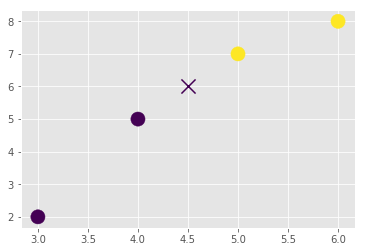

In [13]:
plt.scatter(x_coords, y_coords, c=labels, s=200)
plt.scatter(new_x, new_y, c=new_label, s=200, marker='x')

plt.show()